**This notebook is an exercise in the [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/clustering-with-k-means).**

---


# Introduction #

In this exercise you'll explore our first unsupervised learning technique for creating features, k-means clustering.

Run this cell to set everything up!

- Unsupervised learning alogorithms don't make usage of a target; instead their purpose is to learn some property of the data, to represent the strucute of the feature in a certain methodolgy. 


- In this such context of a feature engineering for prediction, conceptualised such that unsupervisied alogorithm as a "feature discovery" technique.




- Clustering simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithms generates "birds of a feather flock together," .


- Incorporated for feature engineering, attempt to discover groups of customer representing a market segment, for instance, or geographic areas that share similar weather patterns.


- Feature of cluster labels assist in unreviling machine learning models untangle complicated relationships of space or proximity. 

### Cluster Labels as a Feature

- Applied to a single real-valued feature, clustering acts like a traditional "binning" or "Discretization" transform 

- On multiple features, it's like "multi-dimensional binning" (sometimes called vector quantization) 

- Important to remeber that this Cluster feature is categorical. It's shown with a label encoding ( that is, as a sequence of integers) as a typical clustering logrithm would generate; depending on your model, a one-hot encoding may be appropriate.


- The motivating idea for adding cluster labels is that the cluster will break up complicated relationships across some features into simpler chubks.

- Our model can then learn the simpler chunks one-by-one instead having to learn the complicated whole all at once. It's a "divide and conquer" strategy.

- From the figure, showcases the methodolgy whereby improving simple linear model respectively. The curved reationship between the Year-Built and SalePrice is too complicated for this kind of model respectively. 
 

### k-Means Clustering

- Numerous exceptional clustering algorithms, differ primarily in measurement "similarity" or "proximity" and in what particular types of feature most ideally compatabile with. 

- The algorithm incorporated k-means, and is intuitive, easily implemented in a feature engineering context. Therefore whichever application, another algorithm is suitable for accordingly. 

- k-means clustering measures similarity utilising ordinary straight-line distance (Euclidean distance, in other words). It generates clusters by placing a quantity of points, called centroids, inside the feature-space.

- Each point in the dataset is assigned to the cluster of whichever centroid closest to. The "k" in "K-means" how many centroids it generates.



- Imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The results is what's called a Voronoi tessallation. 


- The tessallation expresses what clusters future data will be assigned inevitably; the tessallation is essentially what K-means learns from its training data. 


- The clustering on the Ames Dataset above is a K-means clustering. Here is the same figure with tessallation and centroids shown.

- Review how the K-means algorithm learns the clusters and what that means for feature engineering. Then proceed in focusing on three parameters from scikit-lern's implementation: n_clusters, max_iter and n_init.


- It's simple two-step process, this algorithm begins by randomnly initialising some predefined number (n_clusters) of centriods. It then iterates over these two operations:

1. Assigned points to the nearest cluster centriods
2. Move each centroid to minimize the distance to its points accordingly.


- Iterates over these two processes until the centriods aren't moving anymore, or until maximum number of iterations has passed (max_iter).

- It often occures that the inital random position of the centriods ends in a poor clustering. For this reason the algoirthms repeats a number of times (n_init) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering. 


- Optional may need to increase the max_iter for a large number of clusters of n_init for a complex dataset. Ordinarily though the only paramter you'll need to choose yourself complex dataset. 

- Ordinarily though the only parameter you'll need to choose yourself is n_clusters( k,)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout = True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize = "large",
    titleweight="bold",
    titlesize =  14,
    titlepad = 10,

)

df = pd.read_csv('../input/fe-course-data/housing.csv')

X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]


In [ ]:
df.head()

In [ ]:
X.head()

- K-menas clustering is sesitive to scale, it is great idea to rescale or normalise data with extreme values. Our features are already roughly on the same scale.



In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

In [ ]:
X['Cluster'].head()

- Categorical data type is useful in the following cases:
    i) A string variable consisting of only a few different values. Converting such a string variable to a categorical variables will save some memory.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order 

##N.B. Part 1

- Cluster your data with categorical variables then the KMeans Clustering will work but will not give good results. This is because categorical variables won't contribute much in distance from the mean.

- To clarify this problem we can utlise the K-model clustering which incorporates the model as the measure to classify them as clusters.

- It initially picks random k cluster centroids and check the similarity score rather than euclidian distance in K-means clustering.

- If you have a categorical and continuous variables, we can utlise K-protype and clustering.



- Proceed into construction of couple plots highlighting the count plots to evaluate the effectiveness of this. A scatter plot indicates the geographic distribution of the clusters, It seem like the algorithms generated sparated segments for higher-income areasa on the coasts.

In [ ]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

- Target in this dataset is MedHouseVal (median House Value). These box-plot evaluates the distribution of the target within each cluster. If the clustering is informative these distribution should, for the predominant section, separate across MedHouseVal, which is indeed.

In [ ]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

In [ ]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster" , data=X, kind="boxen", height=6)

In [1]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex4 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Prepare data
df = pd.read_csv("../input/fe-course-data/ames.csv")

/tmp/ipykernel_1295/2216498062.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


The k-means algorithm is sensitive to scale. This means we need to be thoughtful about how and whether we rescale our features since we might get very different results depending on our choices. As a rule of thumb, if the features are already directly comparable (like a test result at different times), then you would *not* want to rescale. On the other hand, features that aren't on comparable scales (like height and weight) will usually benefit from rescaling. Sometimes, the choice won't be clear though. In that case, you should try to use common sense, remembering that features with larger values will be weighted more heavily.

# 1) Scaling Features

Consider the following sets of features. For each, decide whether:
- they definitely should be rescaled,
- they definitely should *not* be rescaled, or
- either might be reasonable

Features:
1. `Latitude` and `Longitude` of cities in California
2. `Lot Area` and `Living Area` of houses in Ames, Iowa
3. `Number of Doors` and `Horsepower` of a 1989 model car

Once you've thought about your answers, run the cell below for discussion.

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


In [3]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

In [4]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

-  Latitude and Longitude of cities in California : No since this would distort the natural distance described by Latitude and Longitude.

- Lot Area and Living Area of houses in Ames: Either rescaling or not is reasonable, hence the living ares of a home tends to be more valuable per sqaure foot, it would be practical to rescale these features thus the lot area isn't weighted in the clustering out of proportion, so its effect on SalePrice.

- Yes, since these don't have comparable units, without rescaling, the number of doors in a car (usually 2 or 4) would have been negligible weight compared to its horsepower.

In [5]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


1. No, since rescaling would distort the natural distances described by Latitude and Longitude.
2. Either choice could be reasonable, but because the living area of a home tends to be more valuable per square foot, it would make sense to rescale these features so that lot area isn't weighted in the clustering out of proportion to its effect on `SalePrice`, if that is what you were trying to predict.
3. Yes, since these don't have comparable units. Without rescaling, the number of doors in a car (usually 2 or 4) would have negligible weight compared to its horsepower (usually in the hundreds).

What you should take away from this is that the decision of whether and how to rescale features is rarely automatic -- it will usually depend on some domain knowledge about your data and what you're trying to predict. Comparing different rescaling schemes through cross-validation can also be helpful. (You might like to check out the `preprocessing` module in scikit-learn for some of the rescaling methods it offers.)


-------------------------------------------------------------------------------

# 2) Create a Feature of Cluster Labels

Creating a k-means clustering with the following parameters:
- features: `LotArea`, `TotalBsmtSF`, `FirstFlrSF`, `SecondFlrSF`,`GrLivArea`
- number of clusters: 10
- iterations: 10

(This may take a moment to complete.)

KMeans(n_clusters=8, *, init="k-means++", n_init="warn", max_iter=300, tol=1e-4, verbose=0, random_state=None, copy_x=True, algorithm="lloyd")
K-Means clustering.

Read more in the User Guide: k_means.

Parameters
   - n_clusters: int, default=8 The number of clusters to form as well as the number of centroids to generate.

- init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++' Method for initialization:

- 'k-means++': selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is "greedy k-means++". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

- 'random': choose n_clusters observations (rows) at random from data for the initial centroids.

    - If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

    - If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

- n_init: 'auto' or int, default=10 Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see :ref:kmeans_sparse_high_dim).

        - When n_init='auto', the number of runs depends on the value of init: 10 if using init='random', 1 if using init='k-means++'.

Added in 1.2

 Added 'auto' option for `n_init`.
Changed in 1.4

Default value for `n_init` will change from 10 to `'auto'` in version 1.4.

- max_iter: int, default=300 Maximum number of iterations of the k-means algorithm for a single run.

  - tol: float, default=1e-4 Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

verbose: int, default=0 Verbosity mode.

- random_state: int, RandomState instance or None, default=None Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary <random_state>.

- copy_x: bool, default=True When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

- algorithm: {"lloyd", "elkan", "auto", "full"}, default="lloyd" K-means algorithm to use. The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it's more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

  - "auto" and "full" are deprecated and they will be removed in Scikit-Learn 1.3. They are both aliases for "lloyd".

Changed in 0.18

  Added Elkan algorithm
  
Changed in 1.1

  Renamed "full" to "lloyd", and deprecated "auto" and "full".
  Changed "auto" to use "lloyd" instead of "elkan".
  
  
#### Attributes

- cluster_centers_: ndarray of shape (n_clusters, n_features) Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

      - labels_: ndarray of shape (n_samples,) Labels of each point

      - inertia_: float Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

      - n_iter_: int Number of iterations run.

      -  n_features_in_: int Number of features seen during fit.

Added in 0.24

- feature_names_in_: ndarray of shape (n_features_in_,) Names of features seen during fit. Defined only when X has feature names that are all strings.

Added in 1.0

See Also
- MiniBatchKMeans: Alternative online implementation that does incremental updates of the centers positions using mini-batches. For large scale learning (say n_samples > 10k) MiniBatchKMeans is probably much faster than the default batch implementation.

Notes

- The k-means problem is solved using either Lloyd's or Elkan's algorithm.

- The average complexity is given by O(k n T), where n is the number of samples and T is the number of iteration.

- The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features. Refer to :doi:"How slow is the k-means method?" D. Arthur and S. Vassilvitskii.

SoCG2006.<10.1145/1137856.1137880> for more details.

- In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That's why it can be useful to restart it several times.

- If the algorithm stops before fully converging (because of tol or max_iter), labels_ and cluster_centers_ will not be consistent, i.e. the cluster_centers_ will not be the means of the points in each cluster. Also, the estimator will reassign labels_ after the last iteration to make labels_ consistent with predict on the training set

In [ ]:
LotArea, TotalBsmtSF, FirstFlrSF, SecondFlrSF,GrLivArea

In [6]:
X = df.copy()
y = X.pop("SalePrice")


# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = ['LotArea','TotalBsmtSF','FirstFlrSF','SecondFlrSF','GrLivArea']


# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10,n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)


# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
Y = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
kmeans.cluster_centers_
array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
# Lines below will give you a hint or solution code
#q_2.hint()
#q_2.solution()

You can run this cell to see the result of the clustering, if you like.

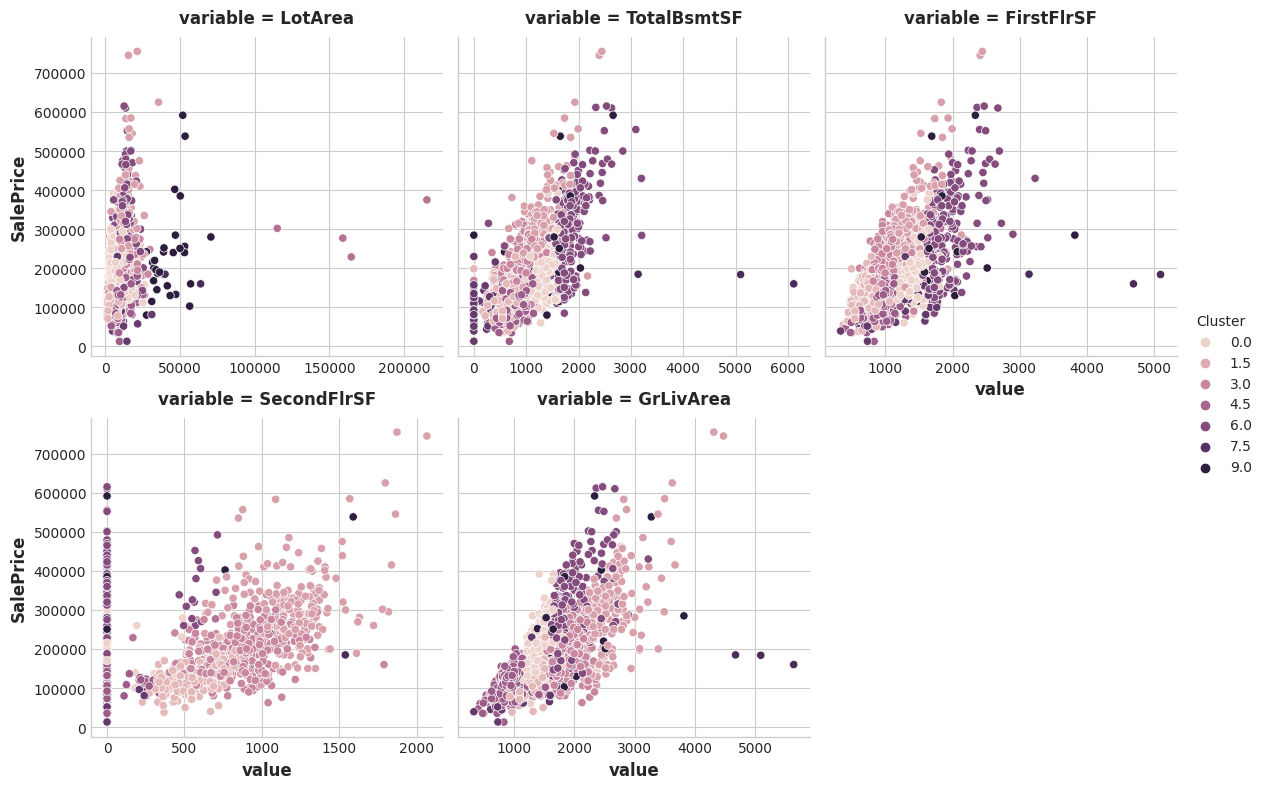

In [7]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("float64")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);


In [ ]:
sns.relplot(
    x="value", y="Saleprice", hue="Clusters", col="variable",
    height=4 , aspect=1, facet_kws={'sharex':False}, col_wrap=3,
    data = Xy.melt(
        id_vars=, value_var    
    )
    

),


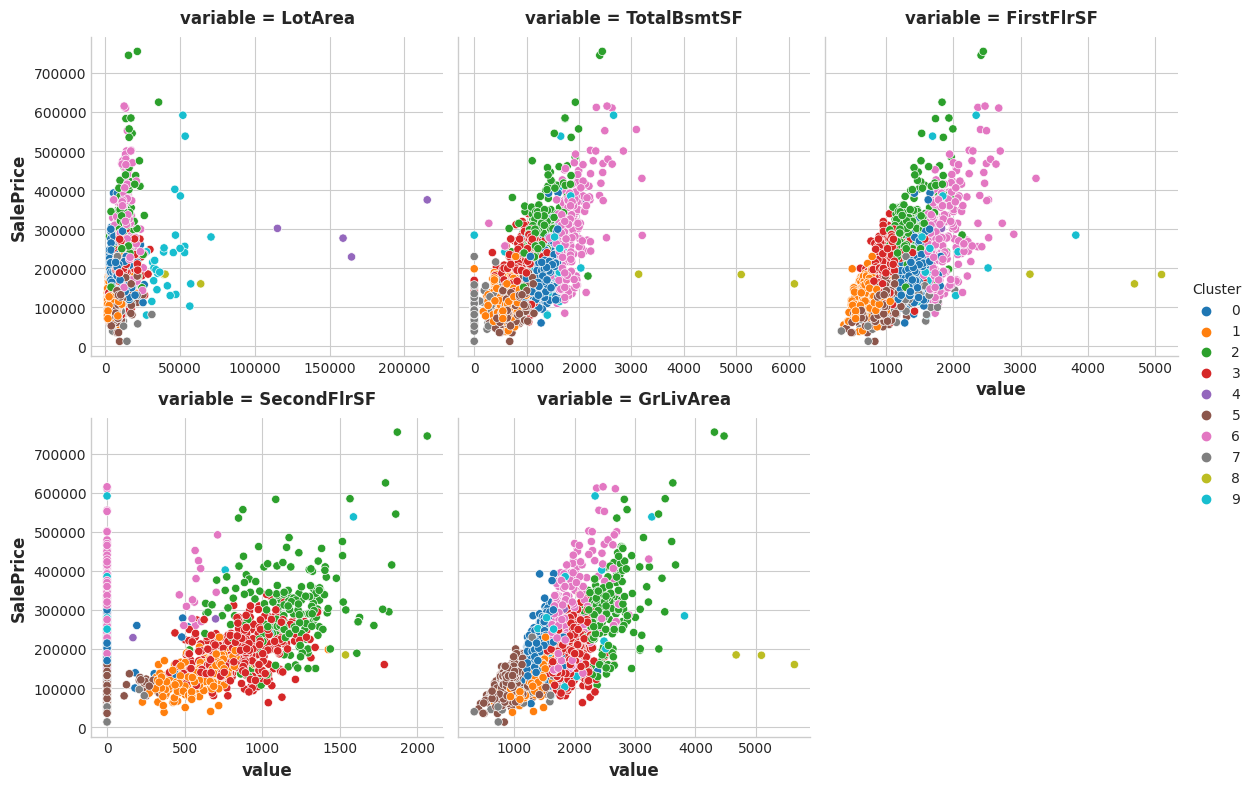

In [8]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);


And as before, `score_dataset` will score your XGBoost model with this new feature added to training data.

#### Note:

- melt(id_vars=None, value_vars=None, var_name=None, value_name: Hashable="value", col_level: Level | None=None, ignore_index: bool=True) -> DataFrame.

In [9]:
score_dataset(X, y)

0.1424377124868132

In [ ]:
score_dataset(X, y)

In [ ]:
Xy["Cluster"].head()

-------------------------------------------------------------------------------

The k-means algorithm offers an alternative way of creating features. Instead of labelling each feature with the nearest cluster centroid, it can measure the distance from a point to all the centroids and return those distances as features.

# 3) Cluster-Distance Features

Now add the cluster-distance features to your dataset. You can get these distance features by using the `fit_transform` method of `kmeans` instead of `fit_predict`.

In [10]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)


# YOUR CODE HERE: Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(X_scaled)


# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)


In [13]:
Tr_1=pd.DataFrame({'Name': ['Tom','Jack','Steve','Ricky'],'Age':[28,34,29,42]}, index=['rank1','rank2','rank3','rank4'])
Tr_1

,Name,Age
rank1,Tom,28
rank2,Jack,34
rank3,Steve,29
rank4,Ricky,42


In [15]:
X_Dat = [{'a':1,'b':10,'c':20}]
X_2 = pd.DataFrame(X_Dat)
X_2

,a,b,c
0,1,10,20


In [17]:
X1_Dat = [{"a":1,"b":2},{"a":5,"b":10,"c":20}]
X_3 = pd.DataFrame(X1_Dat, index=['first','second'])
X_3

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [23]:
pd.DataFrame({"one":pd.Series([1,2,3], index= ['a','b','c']),"two": pd.Series([1,2,3,4], index=['a','b','c','d'])})

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [26]:
d=pd.DataFrame({'one':pd.Series([1,2,3], index=['a','b','c']), 'two':pd.Series([1,2,3,4], index=['a','b','c','d'])})
d            

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [27]:
lst = ['Geeks','For','Geeks','is',
       'portal', 'for','Geeks']

# Calling DataFrame constructor on list
X_4 = pd.DataFrame(lst)
X_4

,0
0,Geeks
1,For
2,Geeks
3,is
4,portal
5,for
6,Geeks


### Creating DataFrame from dict of ndarray/lists:

- To create DataFrame from dict of narray/list, all the narray must be of same length. If index is passed then the length index should be equal to the length of arrays.


- If no index is passes, then by default, index will be the range(n) where n is the array length.


In [34]:
## Defining a dictionary containingemployee data

data = {"Name":['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Age':[27, 24, 22, 32],
        'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd']
       }
X_5 = pd.DataFrame(data)
X_5

,Name,Age,Address,Qualification
0,Jai,27,Delhi,Msc
1,Princi,24,Kanpur,MA
2,Gaurav,22,Allahabad,MCA
3,Anuj,32,Kannauj,Phd


In [35]:
print(X_5[['Name', 'Qualification']])

     Name Qualification
0     Jai           Msc
1  Princi            MA
2  Gaurav           MCA
3    Anuj           Phd


In [37]:
## dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score':[30,45,56,np.nan],
        'Thirs Score':[np.nan, 48,80,98]
       }

#creating a dataframe from list
X_6 = pd.DataFrame(dict)

# using isnull() function
X_6.isnull()

,First Score,Second Score,Thirs Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [40]:
## dictionary of list

dict={'First Score':[100,90, np.nan, 95],
     'Second Score':[30,45,56,np.nan],
     'Third Score': [np.nan, 49,80,98]}

## creating a dataframe fro dictionary
X_7 = pd.DataFrame(dict)

X_7 = X_7.fillna(0)
X_7

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,49.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [12]:



# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

Run this cell to score these new features, if you like.

In [ ]:
score_dataset(X, y)

# Keep Going #

[**Apply principal components analysis**](https://www.kaggle.com/ryanholbrook/principal-component-analysis) to create features from variation in your data.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*